# Gradient Descent
## Definition
Gradient descent is a first-order iterative optimization process to obtain a local minimum of a differentiable function. It is accomplished by taking repeated steps in the opposite direction of the function's gradient (or approximation gradient) at the current position, which is the direction of steepest descent.

<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width=600 height=500 />

## Neural Networks
A computational model that approximates a mapping between inputs and outputs is known as an artificial neural network. It is inspired by the human brain's structure, which is made up of a network of linked neurons that convey information after receiving sets of impulses from nearby neurons. The inputs of it including 
* weights and bias (variables for neural)
* Activation Function
* Loss Function.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVC4-lBgMM0R-NvcBgp0I56MVq_FiWvrlzqw&usqp=CAU" width=400 height=100 />


## Algorithm
It is an optimization algorithm for minimizing the cost function by determining the values of the coefficients of the variables of a function (f). For this project, I use simple linear regression function. Gradient descent search starts with an arbitrary initial weight vector and gradually and frequently adjusts it in tiny stages to find a weight vector (w) that minimizes loss.
* Building a simple linear regression model y = w*x +b


* The function's cost is calculated by putting the coefficients into the function. 
$$ L(w,b) = \frac{1}{2M}\sum_{i=1}^M(wx^i + b - y^i)^2$$, where M is the number of data points. 


* The cost function's derivative is determined. We need to know the slope so that we can figure out which direction (sign) to change the coefficient values in the following iteration to attain a lower cost. As a result, we compute that
\begin{aligned}
\frac{\partial L}{\partial w} &= \frac{1}{M}\sum_{i=1}^M(wx^i+b-y^i)*x^i\\\frac{\partial L}{\partial b} &= \frac{1}{M}\sum_{i=1}^M(wx^i+b-y^i)
\end{aligned}


* We can now update the coefficient values because we know the downhill direction from the derivative. Set the learning rate, which determines how much the coefficients can vary between updates. As a result, we use the formula 

\begin{aligned}
w &= w-\alpha\frac{\partial L}{\partial w} \\  
b &= w-\alpha\frac{\partial L}{\partial b}
\end{aligned}


* This technique is repeated until the cost is zero or close to zero.


## Steps
* Randomly initialize values for the coefficients w and b 
* set MAX_ITER and count = 0
* while count < MAX_ITER,  do coefficient = coefficient — (learning rate $\times$ change)
* count += 1


## Data 
I this project, I will use two dataset to fit simple linear regression and multiple linear regreesion respectively. For simple linear regression, I will use each algothrim discussed in the course. For multiple linear regression,   I will utilize SGDRegressor class provided by Scikit-learn API to implement Stochastic Gradient Descent method for regression problems. 

* **Simple Linear regression data**: one predictor and one response
    * This salary data shows the change in salary based on years of experience. Use this dataset to create machine learning models for prediction of salaries of people based on their years of experience.
        * YearsExperience 
        * Salary 
        
        
        
* **Multiple Linear regression data**: 13 predictors and one response
    * The [Boston Housing Dataset](https://www.kaggle.com/prasadperera/the-boston-housing-dataset) is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 
        * CRIM - per capita crime rate by town
        * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
        * INDUS - proportion of non-retail business acres per town.
        * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        * NOX - nitric oxides concentration (parts per 10 million)
        * RM - average number of rooms per dwelling
        * AGE - proportion of owner-occupied units built prior to 1940
        * DIS - weighted distances to five Boston employment centres
        * RAD - index of accessibility to radial highways
        * TAX - full-value property-tax rate per \$10,000
        * PTRATIO - pupil-teacher ratio by town
        * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        * LSTAT - % lower status of the population
        * MEDV - Median value of owner-occupied homes in $1000's
        
        
## Package 
I will use the following packages in this project:
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [numpy](https://numpy.org)
* [pandas](https://pandas.pydata.org)
* [sklearn](https://scikit-learn.org/stable/)


##  Part One: Simple Linear Regression case
We first try to minimize a loss function of a simple linear regression model via **in class example code**

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
plt.style.use('fivethirtyeight')
%matplotlib inline
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [161]:
X = salary["YearsExperience"]
y = salary["Salary"]
X =  preprocessing.scale(X)
y =  preprocessing.scale(y)
M=len(y)
M

30

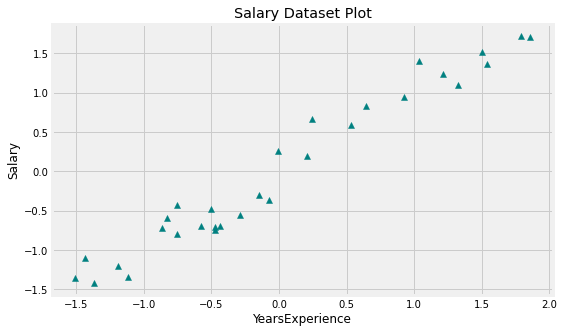

In [155]:
# Visualization of x,y
plt.figure(figsize=(8,5))
plt.scatter(X,y, marker = "^", color = "teal")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Salary Dataset Plot")
plt.show()

In [162]:
# Loss function
def loss(X, y, w, b):
    M = len(y)
    MSE_loss = sum(0.5*(x*w+b-y[i])**2 
               for i,x in enumerate(X))/M
    return MSE_loss

In [163]:
# Partial derivative of w,b 
def gradL(X,y,w,b): 
    M = len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

In [167]:
# Learning rate 
alpha=0.12 # Learning rate not too high or too small

# initial w,b
random_vec=np.random.rand(2)
w=random_vec[0]
b=random_vec[1]

In [168]:
# initial Loss
loss(X,y,w,b)

0.7306019341343852

Loss at iter1 = 0.12651174738947882
Loss at iter10 = 0.032037323748634085
Loss at iter20 = 0.022337291570612736
Loss at iter100 = 0.021521667929314092


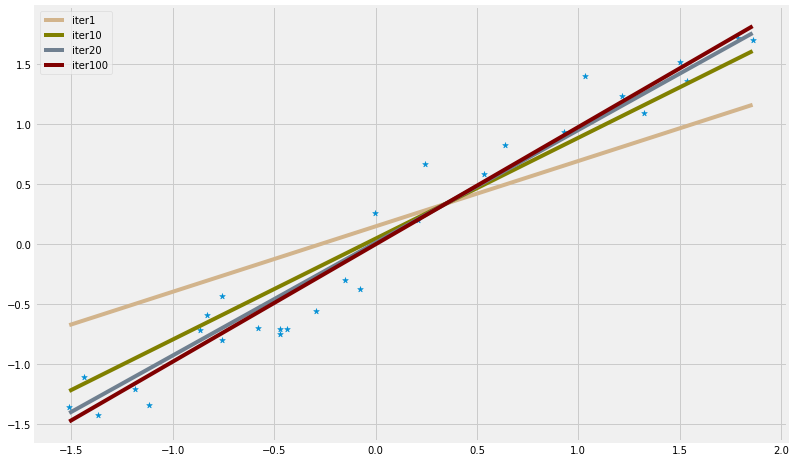

In [171]:
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y, marker = "*")

colors = {1:'tan', 10:'olive', 20:'slategray' , 100:'maroon'}
for i in range(10001):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [1, 10, 20, 100]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()      

I choose to use the same learning rate $\alpha = 0.12$ as in calss code, and randomly select initial value of w and b. From the above output, the loss at iter = 100 is the smallest. 

##  Part Two: multiple Linear regression case
The effective estimator for classification and regression issues is obtained by using the Stochastic Gradient Descent (SGD) method to the linear classifier or regressor. 

The [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class in the API Scikit-learn is used to implement the SGD technique for regression situations. The SGD regressor builds an estimator using a regularized linear model and SGD learning. To decrease the model parameters, a regularizer is a penalty (L1, L2, or Elastic Net) imposed to the loss function. Large-scale datasets function well with the SGD regressor.

In [175]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [178]:
# I will scale both the x and y data before splitting them into train and test sections to increase model accuracy. 
# I will use 15% of the samples as test data in this section.
boston = load_boston()

In [179]:
x, y = boston.data, boston.target

x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

I will change parameters of *SGDRegressor( )* to make comparasion among models. To be specific, I will cpmpare them through the following steps:
* Fit the model on train data and check the model accuracy score **R-squared**
* Using the training model, we may predict the test data. The **RMSE metrics** can be used to verify the correctness of anticipated data.
* Visualize the original and predicted data 

### Changing Loss Function

R-squared at huber = 0.5523848316965345
RMSE at huber = 0.5803006637767649
R-squared at epsilon_insensitive = 0.6964805483852108
RMSE at epsilon_insensitive = 0.5062503132855043
R-squared at squared_epsilon_insensitive = 0.7285171725590913
RMSE at squared_epsilon_insensitive = 0.48383662935922145


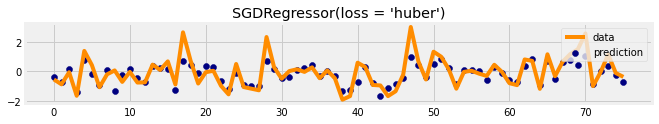

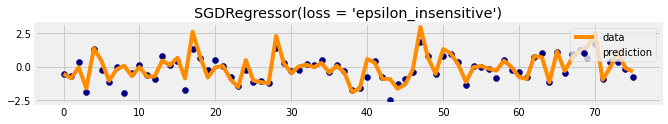

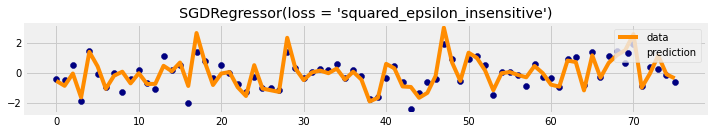

In [180]:
loss = ["huber", "epsilon_insensitive", "squared_epsilon_insensitive"]
index = range(len(ytest))
for i,loss in enumerate(loss):
    sgdr = SGDRegressor(alpha= 0.12,loss = loss)
    sgdr.fit(xtrain, ytrain)
    score = sgdr.score(xtrain, ytrain)
    ypred = sgdr.predict(xtest)
    Rmse = mean_squared_error(ytest, ypred)**(1/2.0)
    print(f'R-squared at {loss} = {score}')
    print(f'RMSE at {loss} = {Rmse}')
    
    plt.figure(figsize=(10,5))
    plt.subplot(3, 1, i+1)
    plt.plot(index, ytest, color="darkorange", label="data")
    plt.scatter(index,ypred, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend(loc = 'upper right')
    plt.title("SGDRegressor(loss = '%s')" % loss)
    
plt.tight_layout()
plt.show()

From the output, model with squared_epsilon_insensitive loss function has the largest accuracy score R-squared and the smallest RMSE, which has the best performance. 

### Changing Max_iter

R-squared at iter100 = 0.7210836447106923
RMSE at iter100 = 0.4833339437752753
R-squared at iter300 = 0.7214577875019212
RMSE at iter300 = 0.4849216511821426
R-squared at iter500 = 0.7219510131303483
RMSE at iter500 = 0.48494238238315457
R-squared at iter1000 = 0.7202137009593945
RMSE at iter1000 = 0.4825945599173577


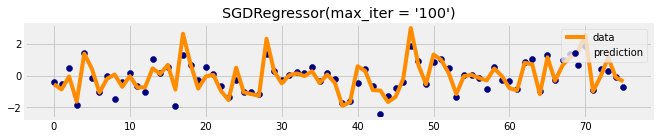

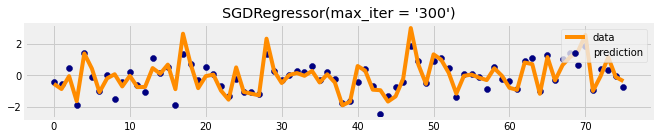

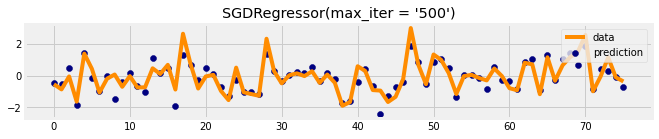

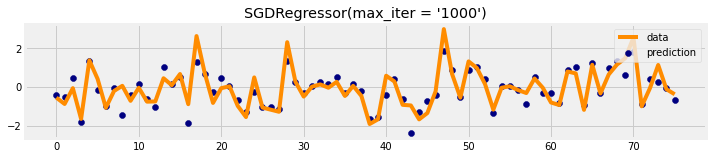

In [181]:
# changing max_iter
for i, iter in enumerate([100, 300, 500, 1000]):
    sgdr = SGDRegressor(alpha= 0.12, max_iter = iter)
    sgdr.fit(xtrain, ytrain)
    score = sgdr.score(xtrain, ytrain)
    ypred = sgdr.predict(xtest)
    Rmse = mean_squared_error(ytest, ypred)**(1/2.0)
    print(f'R-squared at iter{iter} = {score}')
    print(f'RMSE at iter{iter} = {Rmse}')
    
    plt.figure(figsize=(10,8))
    plt.subplot(4, 1, i+1)
    plt.plot(index, ytest, color="darkorange", label="data")
    plt.scatter(index,ypred, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend(loc = 'upper right')
    plt.title("SGDRegressor(max_iter = '%s')" % iter)
    
plt.tight_layout()
plt.show()

Obviously, changing parameter $\textit{max_iter}$ does not make great impact on accuracy score R-squared and 
RMSE of each model

### Changing Learning Rate

R-squared at eta0 0.0001 = 0.5117997330379243
RMSE at eta0 0.0001 = 0.6050882886644213
R-squared at eta0 0.1 = 0.72044964361472
RMSE at eta0 0.1 = 0.5082543333121133
R-squared at eta0 0.2 = 0.673024837419333
RMSE at eta0 0.2 = 0.5715223011635931
R-squared at eta0 0.5 = 0.42085487344468386
RMSE at eta0 0.5 = 0.6177487906851081


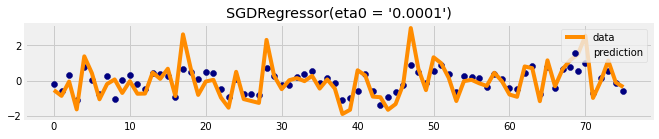

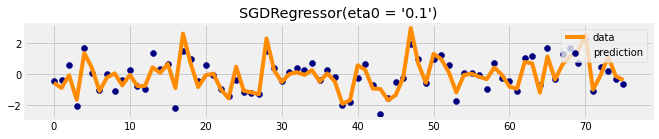

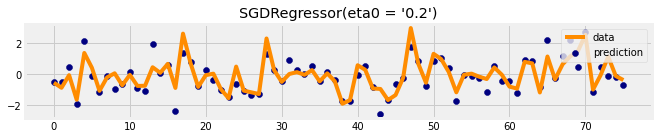

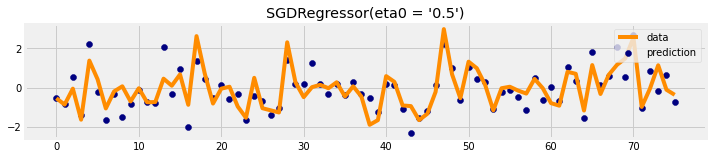

In [182]:
# changing learning rate
for i, learning_rate in enumerate([0.0001, 0.1, 0.2, 0.5]):
    sgdr = SGDRegressor(eta0 = learning_rate)
    sgdr.fit(xtrain, ytrain)
    score = sgdr.score(xtrain, ytrain)
    ypred = sgdr.predict(xtest)
    Rmse = mean_squared_error(ytest, ypred)**(1/2.0)
    print(f'R-squared at eta0 {learning_rate} = {score}')
    print(f'RMSE at eta0 {learning_rate} = {Rmse}')
    
    plt.figure(figsize=(10,8))
    plt.subplot(4, 1, i+1)
    plt.plot(index, ytest, color="darkorange", label="data")
    plt.scatter(index,ypred, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend(loc = 'upper right')
    plt.title("SGDRegressor(eta0 = '%s')" % learning_rate)
    
plt.tight_layout()
plt.show()

When learning rate = 0.1, the model has the largest accuracy score R-squared and smallest RMSE. 

## Reference
Regression Example With SGDRegressor In Python. (n.d.). DataTechNotes: Regression Example with SGDRegressor in Python. https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html.

Education, I. C. (2020, October 27). What Is Gradient Descent?. What is Gradient Descent? | IBM. https://www.ibm.com/cloud/learn/gradient-descent.
